# Representational Similarity Analysis

In [14]:
import rsatoolbox
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [15]:
dataset_v1 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000')
dataset_v2 = Path('/s/babbage/b/nobackup/nblancha/public-datasets/bold5000r2')

In [16]:
def load_df(participant):
    # Dataframe filename
    df_path = dataset_v2 / f'CSI{participant}_dataframe.pkl'
    
    if df_path.is_file():
        df = pd.read_pickle(df_path)
    else:
        df = None
        
    return df

In [17]:
df = load_df(3)

In [18]:
df

image   dataset
0     COCO_train2014_000000292845.jpg      COCO
1     COCO_train2014_000000296474.jpg      COCO
2     COCO_train2014_000000340488.jpg      COCO
3     COCO_train2014_000000072095.jpg      COCO
4     COCO_train2014_000000207833.jpg      COCO
...                               ...       ...
5249                   fireplace3.jpg     Scene
5250              n04418357_1004.JPEG  ImageNet
5251  COCO_train2014_000000099580.jpg      COCO
5252  COCO_train2014_000000497498.jpg      COCO
5253  COCO_train2014_000000331072.jpg      COCO

[5254 rows x 2 columns]

In [7]:
part = h5py.File(dataset_v2 / 'CSI3.h5')

In [8]:
part.keys()

<KeysViewHDF5 ['BRAIN', 'LHEarlyVis', 'LHLOC', 'LHOPA', 'LHPPA', 'LHRSC', 'RHEarlyVis', 'RHLOC', 'RHOPA', 'RHPPA', 'RHRSC']>

In [9]:
roi_list = ['LHEarlyVis', 'LHLOC', 'LHOPA', 'LHPPA', 'LHRSC', 'RHEarlyVis', 'RHLOC', 'RHOPA', 'RHPPA', 'RHRSC']

In [11]:
part['LHEarlyVis'].shape

(5254, 522)

In [23]:
obs_descriptors = {'image': df.image,
                   'dataset': df.dataset}
data = rsatoolbox.data.Dataset(part['BRAIN'][...],
                               obs_descriptors=obs_descriptors
                              )

In [24]:
data

rsatoolbox.data.Dataset(
measurements = 
[[ 0.17618854 -0.27633546  1.24589066 ...  0.88903588  0.52649979
   1.39592662]
 [-0.65421848 -0.29446642 -1.22676134 ... -0.13084254 -0.5053501
   0.42657871]
 [-0.2740903   0.22487578  0.67777899 ...  0.07042083 -0.82490605
  -1.84238814]
 ...
 [ 0.80599269  0.49071911  0.0939379  ...  1.66210282  2.25139457
   1.72050014]
 [-1.14920047 -0.51376142  0.58508334 ... -0.50947494  0.12927232
   1.96066915]
 [-1.1783626   0.84449337 -0.11542046 ... -0.48270492  1.67296181
  -0.88814359]]
descriptors = 
{}
obs_descriptors = 
{'image': 0       COCO_train2014_000000292845.jpg
1       COCO_train2014_000000296474.jpg
2       COCO_train2014_000000340488.jpg
3       COCO_train2014_000000072095.jpg
4       COCO_train2014_000000207833.jpg
                     ...               
5249                     fireplace3.jpg
5250                n04418357_1004.JPEG
5251    COCO_train2014_000000099580.jpg
5252    COCO_train2014_000000497498.jpg
5253    COCO_train201

In [34]:
rdms = rsatoolbox.rdm.calc_rdm(data)

(<Figure size 1440x1440 with 1 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fad1d5558e0>}}))

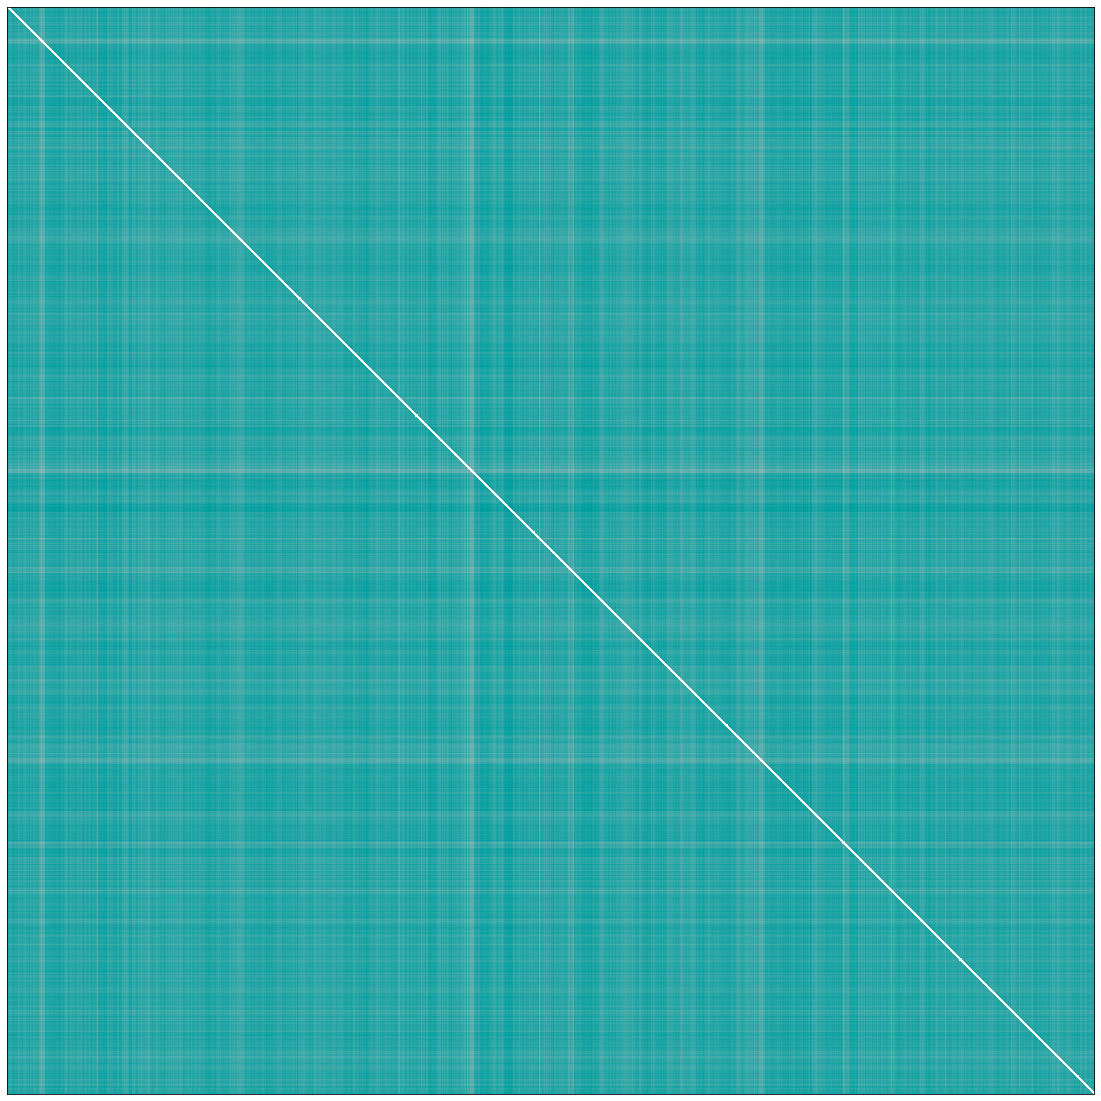

In [26]:
rsatoolbox.vis.show_rdm(rdms, figsize=(20,20))

In [39]:
df.sort_values('dataset').index.values

array([   0, 2786, 2789, ..., 4112, 2485, 4247])

(<Figure size 1440x1440 with 1 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fab491662b0>}}))

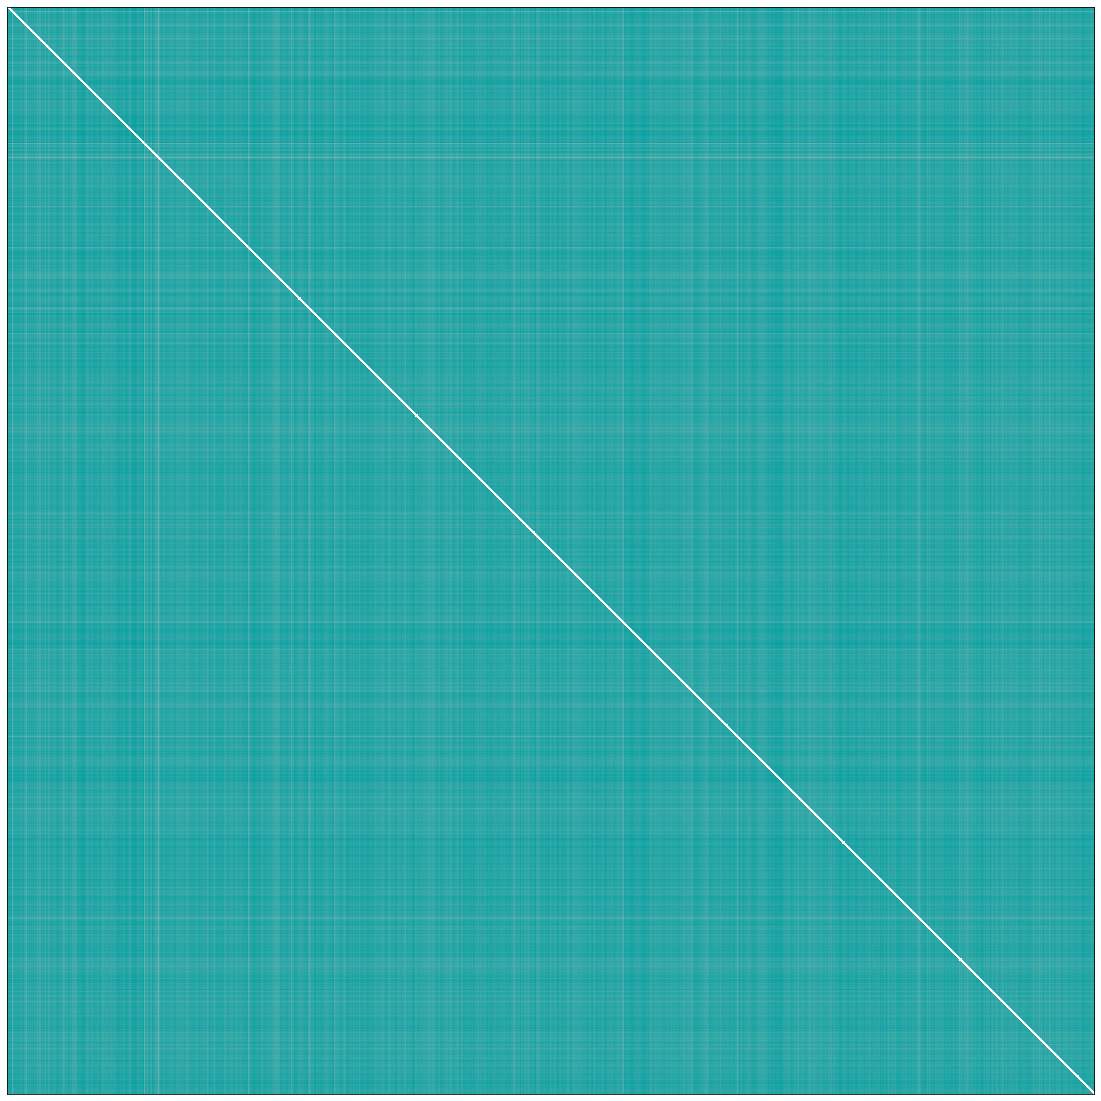

In [44]:
rsatoolbox.vis.show_rdm(rdms, figsize=(20,20))

In [43]:
rdms.sort_by(index=df.sort_values('dataset').index.to_list())

In [45]:
data.sort_by('dataset')
rdms = rsatoolbox.rdm.calc_rdm(data)

(<Figure size 1440x1440 with 1 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fab22109e20>}}))

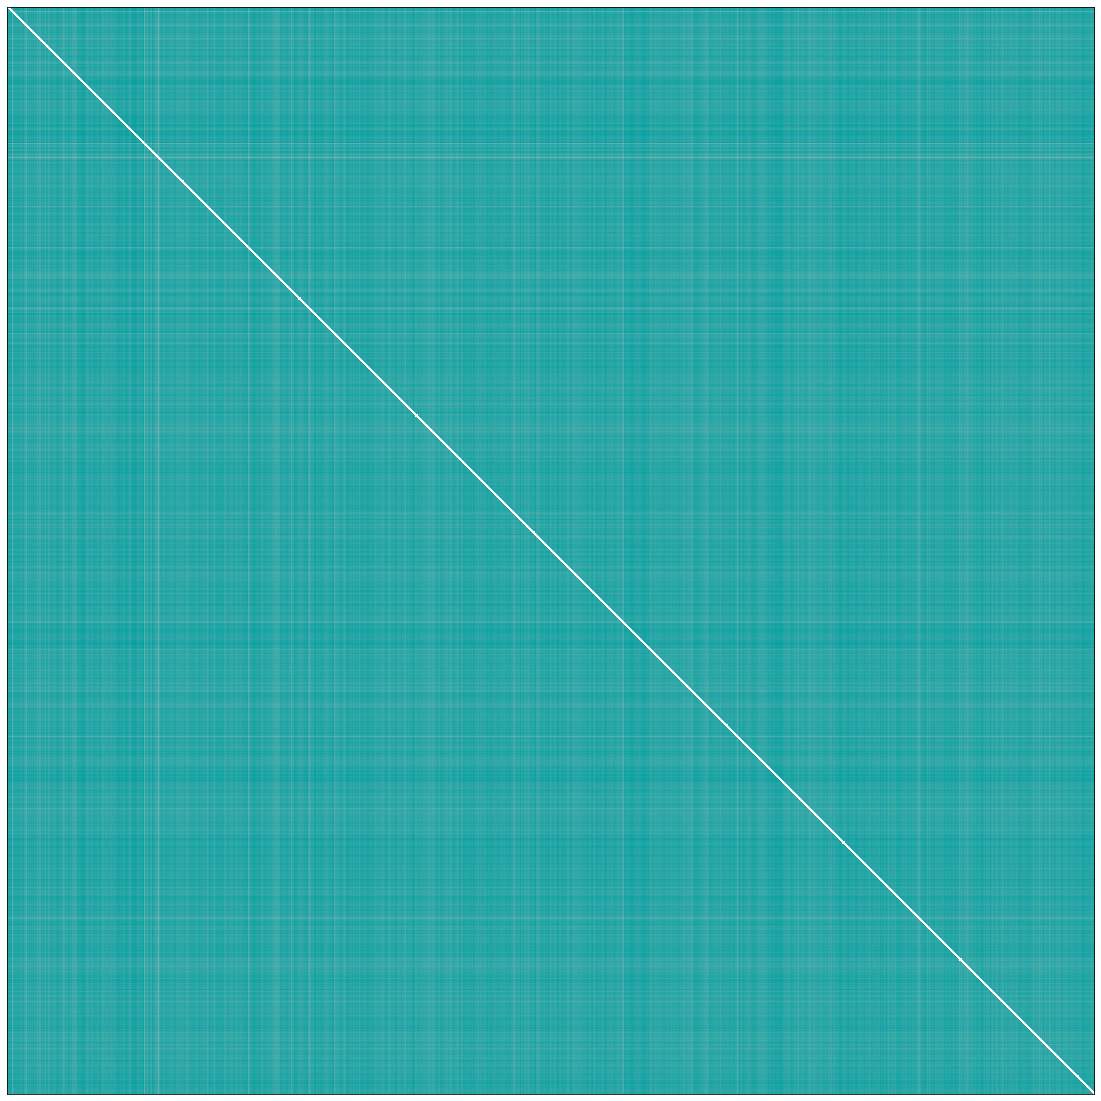

In [47]:
rsatoolbox.vis.show_rdm(rdms, figsize=(20,20))

In [31]:
rdms_dataset = rsatoolbox.rdm.calc_rdm(data, descriptor='dataset')

(<Figure size 144x144 with 2 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fab496297c0>,
               'colorbar': <matplotlib.colorbar.Colorbar at 0x7fab49584820>,
               'y_labels': [Text(0, 0, 'COCO'),
                Text(0, 1, 'ImageNet'),
                Text(0, 2, 'Scene')],
               'x_labels': [Text(0, 0, 'COCO'),
                Text(1, 0, 'ImageNet'),
                Text(2, 0, 'Scene')]}}))

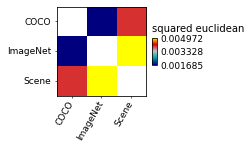

In [36]:
rsatoolbox.vis.show_rdm(rdms_dataset, pattern_descriptor='dataset', show_colorbar='panel')

In [33]:
rdms_dataset

rsatoolbox.rdm.RDMs(
dissimilarity_measure = 
squared euclidean
dissimilarities = 
[[0.00168543 0.00393778 0.00497154]]
descriptors = 
{}
rdm_descriptors = 
{'index': [0]}
pattern_descriptors = 
{'index': [0, 2, 1], 'dataset': ['COCO', 'ImageNet', 'Scene']}

In [51]:
dup = df[df.image.duplicated()].sort_values('image').index.values

In [54]:
brain_data = part['BRAIN'][:]
dup_data = brain_data[dup]

(<Figure size 144x144 with 2 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fad130ebdc0>,
               'colorbar': <matplotlib.colorbar.Colorbar at 0x7facf4cf2fa0>}}))

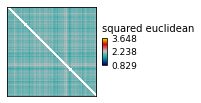

In [56]:
dup_dataset = rsatoolbox.data.Dataset(dup_data)
dup_rdms = rsatoolbox.rdm.calc_rdm(dup_dataset)
rsatoolbox.vis.show_rdm(dup_rdms, show_colorbar='panel')

(<Figure size 1440x1440 with 2 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7facf4c18be0>,
               'colorbar': <matplotlib.colorbar.Colorbar at 0x7facf43b5c40>}}))

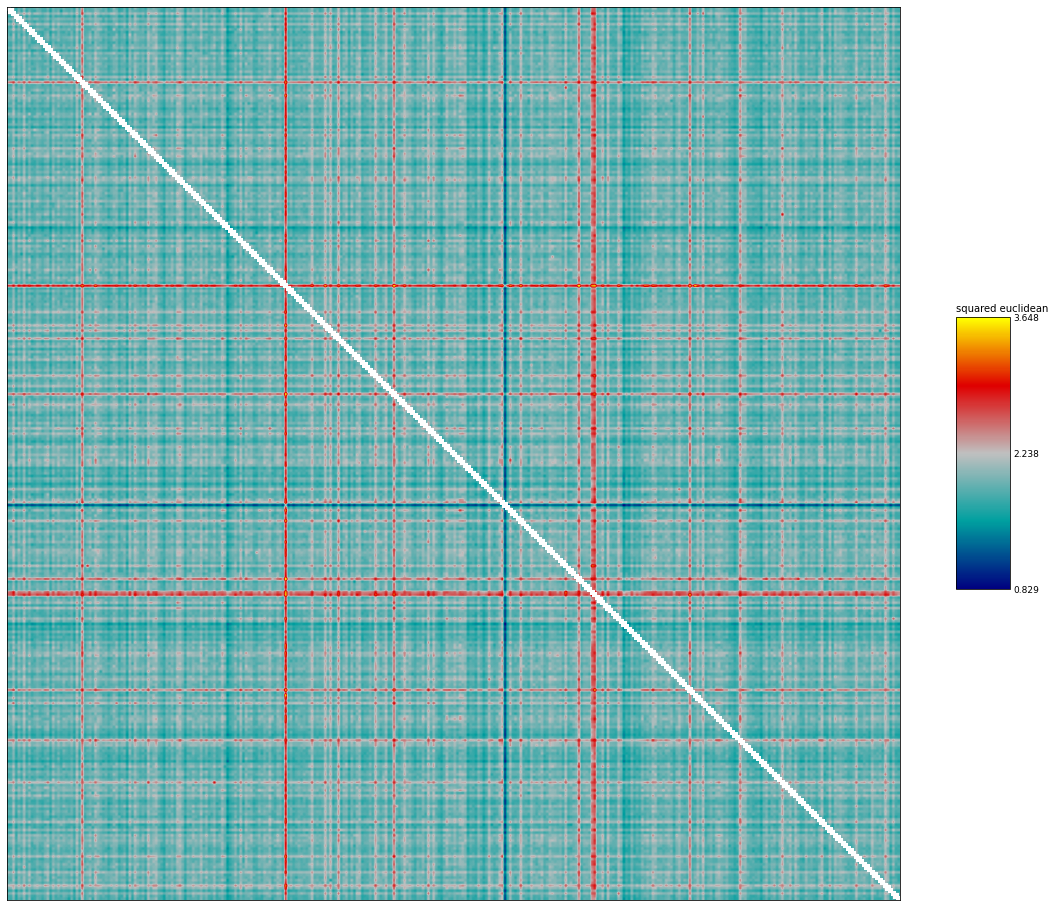

In [57]:
rsatoolbox.vis.show_rdm(dup_rdms, show_colorbar='panel', figsize=(20,20))

In [61]:
df[df.image.duplicated()].sort_values('image')

image dataset
2761  COCO_train2014_000000027710.jpg    COCO
4088  COCO_train2014_000000027710.jpg    COCO
2396  COCO_train2014_000000027710.jpg    COCO
4551  COCO_train2014_000000027710.jpg    COCO
2952  COCO_train2014_000000028868.jpg    COCO
...                               ...     ...
1426                  squashcourt.jpg   Scene
2480                      tailor6.jpg   Scene
3316                      tailor6.jpg   Scene
4588                      tailor6.jpg   Scene
4301                      tailor6.jpg   Scene

[338 rows x 2 columns]

(<Figure size 1440x1440 with 2 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7facf4028880>,
               'colorbar': <matplotlib.colorbar.Colorbar at 0x7facd60988e0>}}))

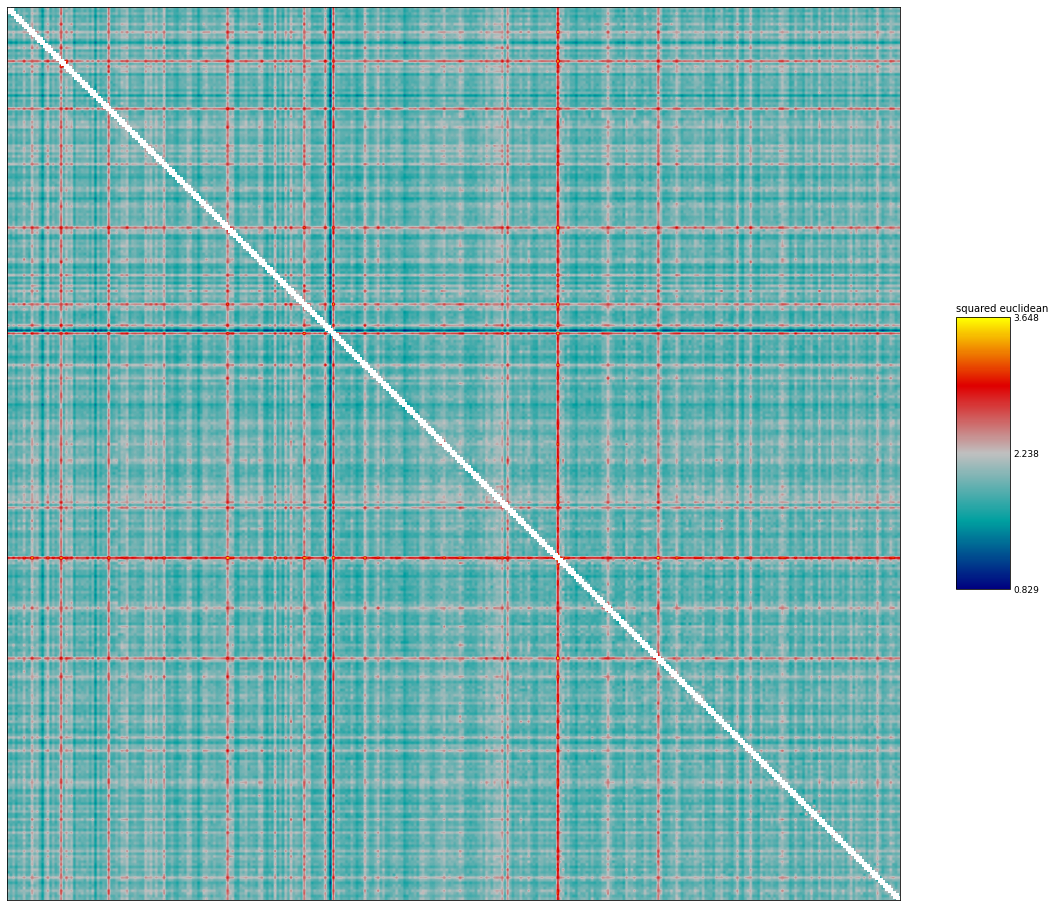

In [60]:
dup_dataset_unordered = rsatoolbox.data.Dataset(brain_data[df[df.image.duplicated()].index])
dup_rdms_unordered = rsatoolbox.rdm.calc_rdm(dup_dataset_unordered)
rsatoolbox.vis.show_rdm(dup_rdms_unordered, show_colorbar='panel', figsize=(20,20))

In [63]:
part[roi_list[0]]

<HDF5 dataset "LHEarlyVis": shape (5254, 522), type "<f8">

In [64]:
roi_array = None
obs_descriptors = {'image': df.image,
                   'dataset': df.dataset}

roi_arrays=[]
channel_roi = []

for roi in roi_list:
    roi_arrays.append(part[roi])
    channel_roi.extend([roi] * part[roi].shape[1])

In [69]:
all_roi_data = np.concatenate(roi_arrays, axis=1)

In [71]:
all_roi_data.shape

(5254, 3104)

In [72]:
len(channel_roi)

3104

In [73]:
roi_arrays

[<HDF5 dataset "LHEarlyVis": shape (5254, 522), type "<f8">,
 <HDF5 dataset "LHLOC": shape (5254, 430), type "<f8">,
 <HDF5 dataset "LHOPA": shape (5254, 187), type "<f8">,
 <HDF5 dataset "LHPPA": shape (5254, 112), type "<f8">,
 <HDF5 dataset "LHRSC": shape (5254, 78), type "<f8">,
 <HDF5 dataset "RHEarlyVis": shape (5254, 696), type "<f8">,
 <HDF5 dataset "RHLOC": shape (5254, 597), type "<f8">,
 <HDF5 dataset "RHOPA": shape (5254, 205), type "<f8">,
 <HDF5 dataset "RHPPA": shape (5254, 161), type "<f8">,
 <HDF5 dataset "RHRSC": shape (5254, 116), type "<f8">]

In [74]:
channel_roi[-10:-1]

['RHRSC',
 'RHRSC',
 'RHRSC',
 'RHRSC',
 'RHRSC',
 'RHRSC',
 'RHRSC',
 'RHRSC',
 'RHRSC']

In [75]:
chn_descriptors = {'roi': channel_roi}

In [76]:
all_roi_dataset = rsatoolbox.data.Dataset(all_roi_data,
                                          obs_descriptors=obs_descriptors,
                                          channel_descriptors=chn_descriptors
                                         )

In [77]:
all_roi_rdms = rsatoolbox.rdm.calc_rdm(all_roi_dataset, )

(<Figure size 144x144 with 1 Axes>,
 array([[<AxesSubplot:title={'center':'roi'}>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'roi'}>: {'image': <matplotlib.image.AxesImage at 0x7facbee0e310>}}))

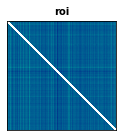

In [81]:
rsatoolbox.vis.show_rdm(all_roi_rdms,
                        rdm_descriptor='roi')

In [84]:
all_roi_rdms.sort_by(dataset='alpha')

KeyError: 'dataset'

In [87]:
all_roi_data_sorted = all_roi_data[df.sort_values('dataset').index]

In [88]:
all_roi_dataset_sorted = rsatoolbox.data.Dataset(all_roi_data_sorted, obs_descriptors=obs_descriptors)

In [90]:
all_roi_rdms_sorted = rsatoolbox.rdm.calc_rdm(all_roi_dataset_sorted)

(<Figure size 144x144 with 1 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7facbdb614f0>}}))

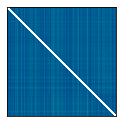

In [91]:
rsatoolbox.vis.show_rdm(all_roi_rdms_sorted)

(<Figure size 1440x1440 with 1 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7facc1303310>}}))

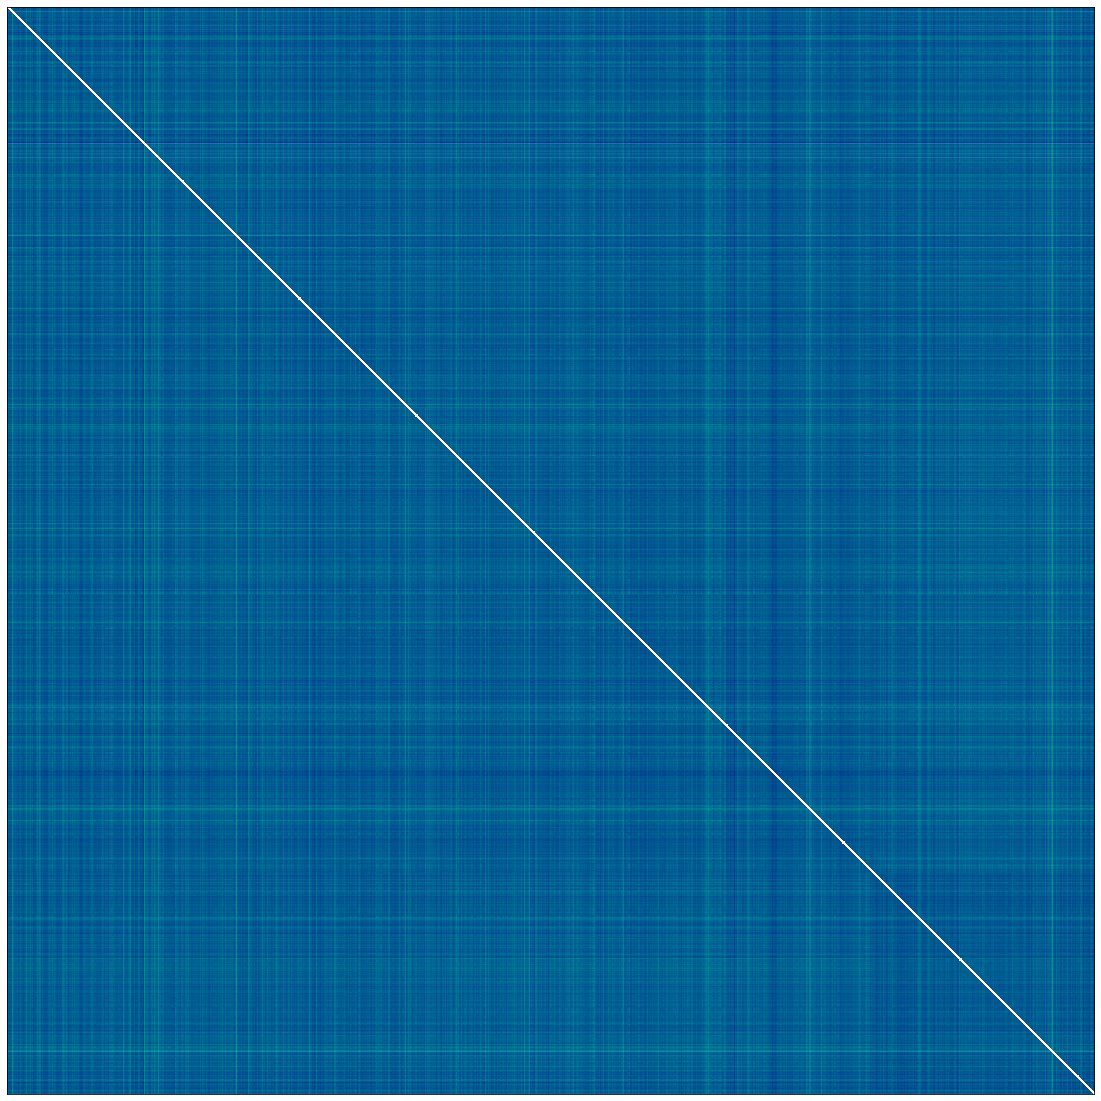

In [92]:
rsatoolbox.vis.show_rdm(all_roi_rdms_sorted, figsize=(20,20))

In [100]:
roi_data_list = []

for roi in roi_list:
    des = {'roi': roi}
    roi_data_list.append(
        rsatoolbox.data.Dataset(np.array(part[roi])[df.sort_values('dataset').index],
                                descriptors=des,
                                obs_descriptors=obs_descriptors
                               )
    )

In [125]:
roi_rdms = rsatoolbox.rdm.calc_rdm(roi_data_list)

(<Figure size 720x720 with 13 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>],
        [<AxesSubplot:title={'center':'LHRSC'}>,
         <AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>],
        [<AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHEarlyVis'}>: {'image': <matplotlib.image.AxesImage at 0x7fa71a34a640>},
              <AxesSubplot:title={'center':'LHLOC'}>: {'image': <matplotlib.image.AxesImage at 0x7fa6add23b80>},
              <AxesSubplot:title={'center':'LHOPA'}>: {'image': <matplotlib.image.AxesImage at 0x7fa71903eac0>},
              <AxesSubplot:title={'cente

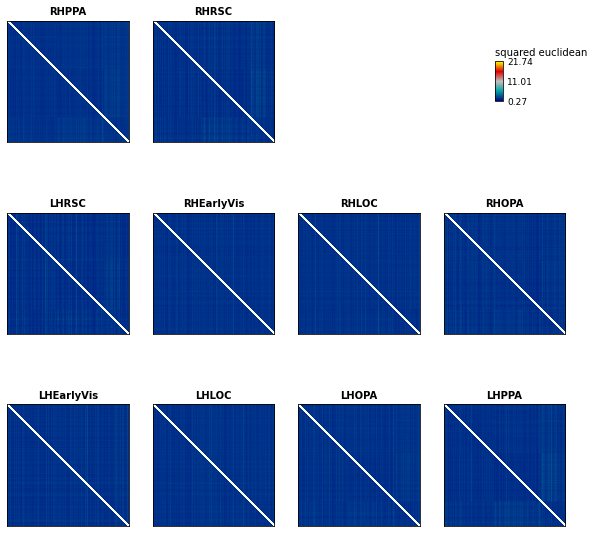

In [103]:
rsatoolbox.vis.show_rdm(
    roi_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    show_colorbar='figure'
)

(<Figure size 720x720 with 26 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>,
         <AxesSubplot:title={'center':'LHRSC'}>],
        [<AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>,
         <AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>],
        [<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>,
         <AxesSubplot:title={'center':'LHRSC'}>],
        [<AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>,
         <AxesSubplot:title={'center':'RHPPA'}>,
         

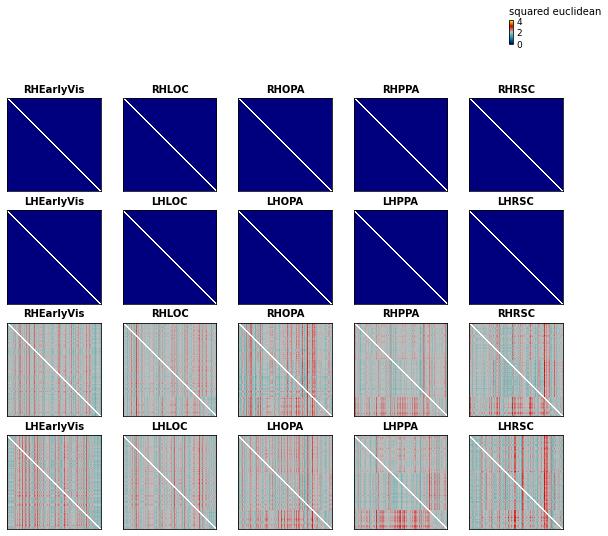

In [126]:
rsatoolbox.vis.show_rdm(
    roi_rdms, 
    figsize=(10,10), 
    rdm_descriptor='roi', 
    show_colorbar='figure',
    vmax=4.0
)

In [105]:
df_sorted = df.sort_values('dataset')
df_sorted.dataset

0        COCO
2786     COCO
2789     COCO
2794     COCO
2796     COCO
        ...  
4114    Scene
4113    Scene
4112    Scene
2485    Scene
4247    Scene
Name: dataset, Length: 5254, dtype: object

In [106]:
roi_data_list = []
df_sorted = df.sort_values('dataset')

for roi in roi_list:
    des = {'roi': roi}
    roi_data_list.append(
        rsatoolbox.data.Dataset(np.array(part[roi])[df_sorted.index],
                                descriptors=des,
                                obs_descriptors={'dataset': df_sorted.dataset}
                               )
    )

In [107]:
roi_rdms = rsatoolbox.rdm.calc_rdm(roi_data_list, descriptor='dataset')

(<Figure size 720x720 with 13 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>],
        [<AxesSubplot:title={'center':'LHRSC'}>,
         <AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>],
        [<AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHEarlyVis'}>: {'image': <matplotlib.image.AxesImage at 0x7fa66329d4f0>,
               'y_labels': [Text(0, 0, 'COCO'),
                Text(0, 1, 'ImageNet'),
                Text(0, 2, 'Scene')],
               'x_labels': [Text(0, 0, 'COCO'),
                Text(1, 0, 'ImageNet'),
                Text(2, 0, 'Scene')]},
              

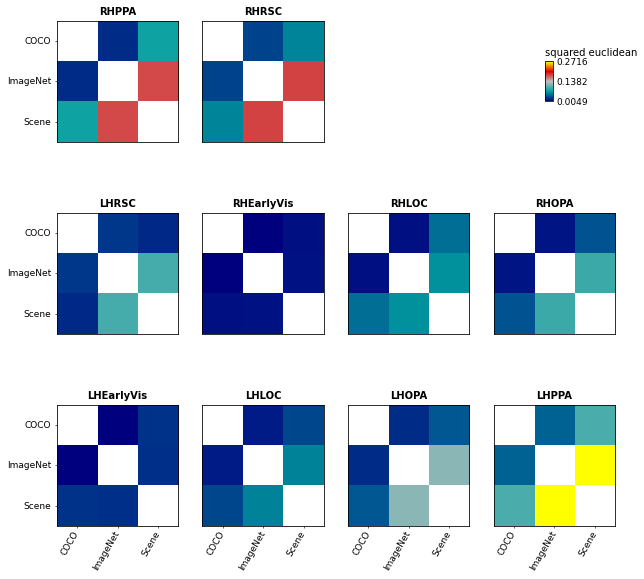

In [109]:
rsatoolbox.vis.show_rdm(roi_rdms, 
                        figsize=(10,10), 
                        rdm_descriptor='roi', 
                        show_colorbar='figure',
                        pattern_descriptor='dataset'
                       )

## Sanity Check with V1 Data

In [110]:
v1_part = h5py.File(dataset_v1 / 'ROIs' / 'CSI3' / 'h5' / 'CSI3_ROIs_TR34.h5')

In [112]:
v1_part.keys()

<KeysViewHDF5 ['LHEarlyVis', 'LHLOC', 'LHOPA', 'LHPPA', 'LHRSC', 'RHEarlyVis', 'RHLOC', 'RHOPA', 'RHPPA', 'RHRSC']>

In [113]:
roi_list

['LHEarlyVis',
 'LHLOC',
 'LHOPA',
 'LHPPA',
 'LHRSC',
 'RHEarlyVis',
 'RHLOC',
 'RHOPA',
 'RHPPA',
 'RHRSC']

In [117]:
v1_roi_data_list = []

for roi in roi_list:
    des = {'roi': roi}
    v1_roi_data_list.append(
        rsatoolbox.data.Dataset(np.array(v1_part[roi])[df_sorted.index],
                                descriptors=des,
                                obs_descriptors={'dataset': df_sorted.dataset}
                               )
    )

In [118]:
v1_roi_rdms_dataset = rsatoolbox.rdm.calc_rdm(v1_roi_data_list, descriptor='dataset')

(<Figure size 720x720 with 13 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>],
        [<AxesSubplot:title={'center':'LHRSC'}>,
         <AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>],
        [<AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHEarlyVis'}>: {'image': <matplotlib.image.AxesImage at 0x7fa662b470d0>,
               'y_labels': [Text(0, 0, 'COCO'),
                Text(0, 1, 'ImageNet'),
                Text(0, 2, 'Scene')],
               'x_labels': [Text(0, 0, 'COCO'),
                Text(1, 0, 'ImageNet'),
                Text(2, 0, 'Scene')]},
              

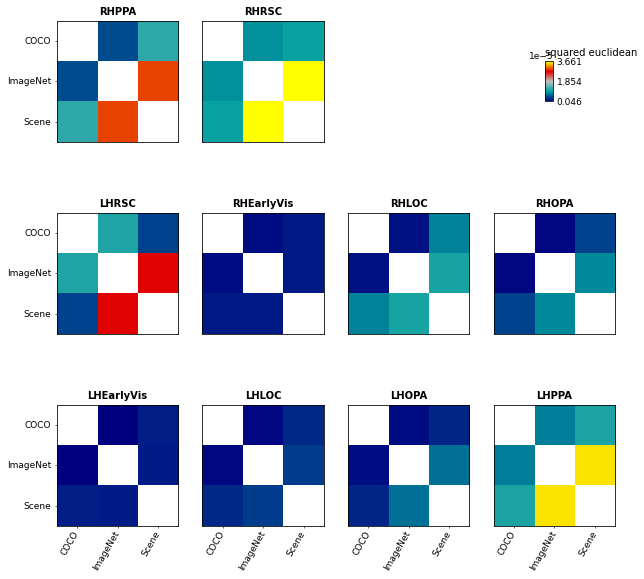

In [119]:
rsatoolbox.vis.show_rdm(v1_roi_rdms_dataset, 
                        figsize=(10,10), 
                        rdm_descriptor='roi', 
                        show_colorbar='figure',
                        pattern_descriptor='dataset'
                       )

In [120]:
v1_roi_rdms = rsatoolbox.rdm.calc_rdm(v1_roi_data_list)

(<Figure size 720x720 with 13 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>],
        [<AxesSubplot:title={'center':'LHRSC'}>,
         <AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>],
        [<AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHEarlyVis'}>: {'image': <matplotlib.image.AxesImage at 0x7fa68d877fa0>},
              <AxesSubplot:title={'center':'LHLOC'}>: {'image': <matplotlib.image.AxesImage at 0x7fa613c79640>},
              <AxesSubplot:title={'center':'LHOPA'}>: {'image': <matplotlib.image.AxesImage at 0x7fa67e32ee50>},
              <AxesSubplot:title={'cente

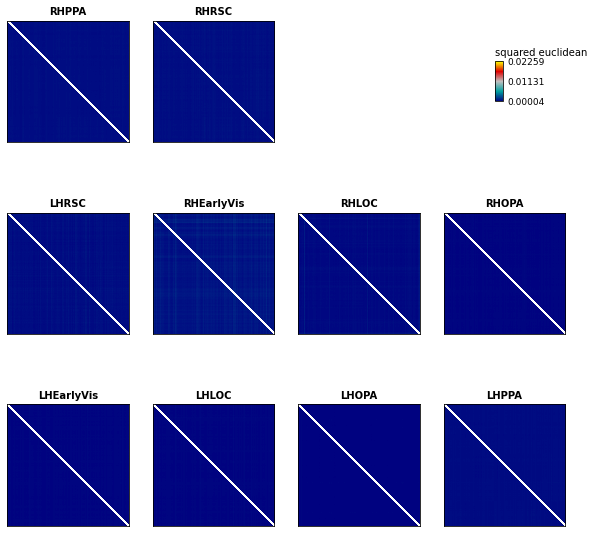

In [122]:
rsatoolbox.vis.show_rdm(v1_roi_rdms, 
                        figsize=(10,10), 
                        rdm_descriptor='roi', 
                        show_colorbar='figure',
                       )

(<Figure size 720x720 with 13 Axes>,
 array([[<AxesSubplot:title={'center':'LHEarlyVis'}>,
         <AxesSubplot:title={'center':'LHLOC'}>,
         <AxesSubplot:title={'center':'LHOPA'}>,
         <AxesSubplot:title={'center':'LHPPA'}>],
        [<AxesSubplot:title={'center':'LHRSC'}>,
         <AxesSubplot:title={'center':'RHEarlyVis'}>,
         <AxesSubplot:title={'center':'RHLOC'}>,
         <AxesSubplot:title={'center':'RHOPA'}>],
        [<AxesSubplot:title={'center':'RHPPA'}>,
         <AxesSubplot:title={'center':'RHRSC'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:title={'center':'LHEarlyVis'}>: {'image': <matplotlib.image.AxesImage at 0x7fa4e545b940>},
              <AxesSubplot:title={'center':'LHLOC'}>: {'image': <matplotlib.image.AxesImage at 0x7fa33f016d60>},
              <AxesSubplot:title={'center':'LHOPA'}>: {'image': <matplotlib.image.AxesImage at 0x7fa35edca520>},
              <AxesSubplot:title={'cente

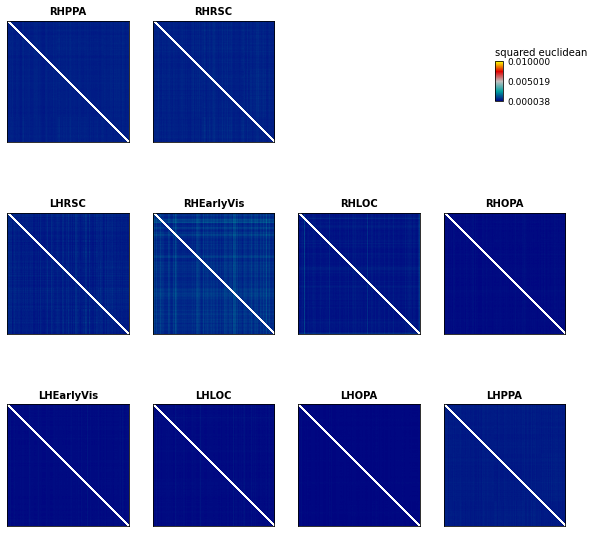

In [123]:
rsatoolbox.vis.show_rdm(v1_roi_rdms, 
                        figsize=(10,10), 
                        rdm_descriptor='roi', 
                        show_colorbar='figure',
                        vmax=0.01
                       )